1. ***Data Cleaning...***

Important Utilitise for the Model

In [207]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


Loading the dataset.

In [208]:
dat = pd.read_csv("/content/Cleaned_data_for_model.csv")
dat.head()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


Taking a small dataset from the big one to train the model

In [209]:
data = dat.head(500)

Dropping the unnamed column from the data set as it is of no use to us

In [211]:
data = data.drop(['Unnamed: 0'], axis=1, errors='ignore')

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  500 non-null    object 
 1   price          500 non-null    int64  
 2   location       500 non-null    object 
 3   city           500 non-null    object 
 4   baths          500 non-null    int64  
 5   purpose        500 non-null    object 
 6   bedrooms       500 non-null    int64  
 7   Area_in_Marla  500 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 31.4+ KB


In [213]:
print(data.isnull().sum())

property_type    0
price            0
location         0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
dtype: int64


In [214]:
data.drop_duplicates(inplace=True)

In [215]:
print(data.dtypes)

property_type     object
price              int64
location          object
city              object
baths              int64
purpose           object
bedrooms           int64
Area_in_Marla    float64
dtype: object


Performing the preprocessing steps and Visualization

Text(0.5, 1.0, 'Price VS Area Graph')

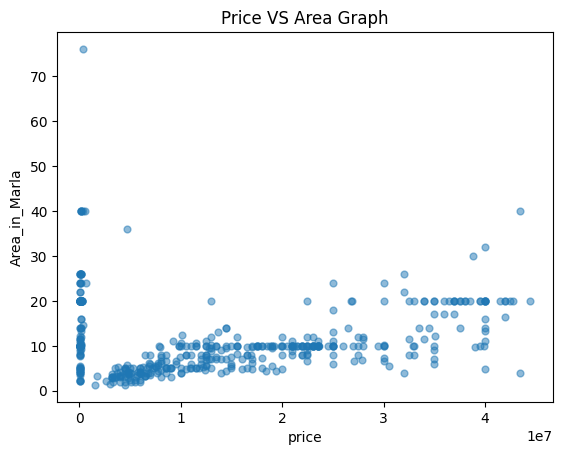

In [217]:
data.plot(kind='scatter', x='price', y='Area_in_Marla', s=24, alpha=0.5)
plt.title('Price VS Area Graph')

In [218]:
zero_bedrooms = data[data['bedrooms'] == 0]
print(zero_bedrooms)


    property_type    price             location       city  baths   purpose  \
230          Flat  6000000  Bahria Town Karachi    Karachi      2  For Sale   
341          Flat  5049000            Scheme 33    Karachi      2  For Sale   
369          Flat    75000                  I-8  Islamabad      2  For Rent   

     bedrooms  Area_in_Marla  
230         0            4.2  
341         0            4.0  
369         0            5.1  


In [219]:
data = data[data['bedrooms'] > 0]

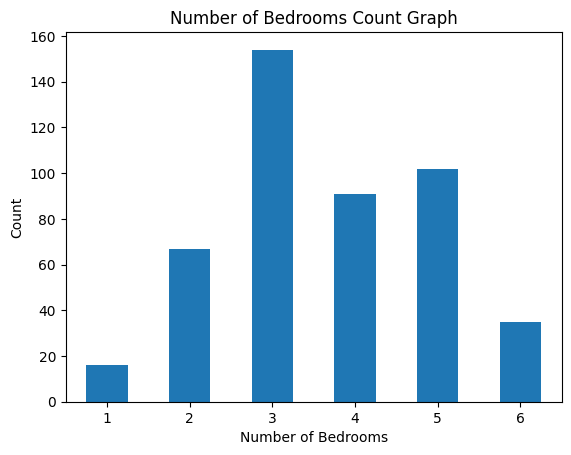

In [220]:
bedroom_count = data['bedrooms'].value_counts()
bedroom_c_sorted = bedroom_count.sort_index()
bedroom_c_sorted.plot(kind='bar')
plt.title('Number of Bedrooms Count Graph')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

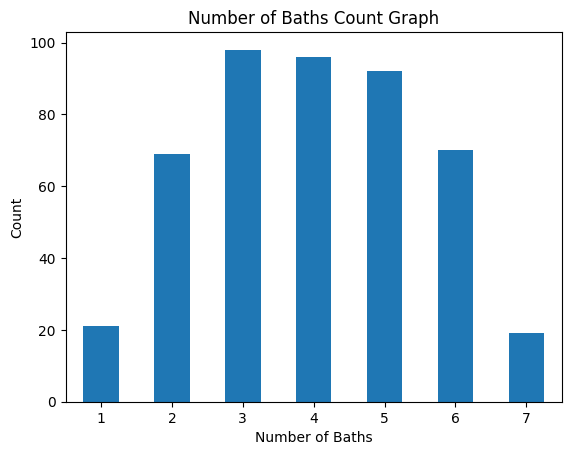

In [221]:
bathroom_count = data['baths'].value_counts()
bathroom_c_sorted = bathroom_count.sort_index()
bathroom_c_sorted.plot(kind='bar')
plt.title('Number of Baths Count Graph')
plt.xlabel('Number of Baths')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

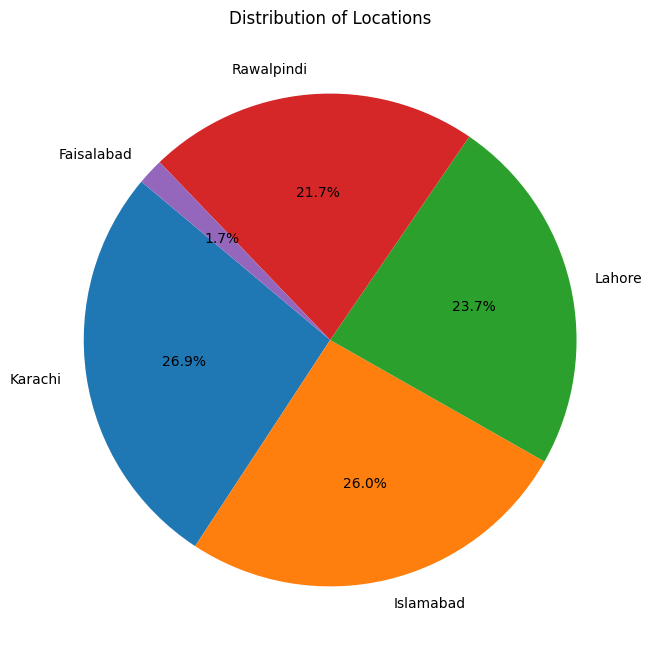

In [222]:
location_count = data['city'].value_counts()
location_count.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8))
plt.title('Distribution of Locations')
plt.ylabel('')  # Hide the y-label for pie chart
plt.show()

In [232]:
encoder = LabelEncoder()

In [ ]:
encoding_col = ['property_type','location','city','purpose']
for col in encoding_col:
    data[col] = encoder.fit_transform(data[col])

In [235]:
data

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,10000000,63,1,2,1,2,4.0
1,0,6900000,48,1,3,1,3,5.6
2,1,16500000,66,1,6,1,5,8.0
3,1,43500000,28,1,4,1,4,40.0
4,1,7000000,45,1,3,1,3,8.0
...,...,...,...,...,...,...,...,...
495,2,110000,53,1,3,0,3,20.0
496,0,40000,45,1,4,0,3,10.0
497,0,40000,48,1,3,0,3,4.4
498,1,400000,55,1,6,0,5,76.0


In [236]:
x = data.drop('price', axis=1)
y = data['price']

In [237]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1,1))

Now Model selection and Training

In [238]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [239]:
l_model = LinearRegression()
l_model.fit(x_train,y_train)

LinearRegression()

Model Evaluation and Fine-Tuning

In [240]:
y_predict = l_model.predict(x_test)

In [ ]:
y_predict

In [242]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

In [243]:
mse

0.028957327075034085

In [244]:
mae

0.134705306298922

In [245]:
l_acc = r2_score(y_test, y_predict)

Final Accuracy is 65%

In [246]:
l_acc

0.65059076885586